# Part I - (Capital bikeshare Data Exploration)
## by (Babafemi E. 'Muyiwa)

## Introduction
- This datasets reveals the results of the October, 2021 Capital Bikeshare customer use acquired for the Capital Bikeshare service.
- This data set includes information about  bike-sharing system covering Arlington County, VA, the City of Alexandria, VA, Montgomery County, MD, and Fairfax County, VA, all within the District of Columbia in Washington. The dataset used for this project was the one collected for the month of October in the year 2021. This datase is open source at it is available for download at https://s3.amazonaws.com/capitalbikeshare-data/index.html.

- This project amongst other deliverables aims to answer the following questions:
    - When are most trips taken in terms of time of day or day of the week?
    - What type of bike do riders prefer?
    - When are most trips taken in terms of time of day or day of the week?<br>
    - How long does the average trip take?<br>
    - Does the above depend on if a user_type (member or casual)?<br>
    

__The columns are briefly explained below.__
- ride_id - Identification number for each ride.<br>
- rideable_type - The type of bike available (classic,docked and electric bike)<br>
- started_at – Includes start time<br>
- ended_at – Includes end time<br>
- start_station_name – Includes starting station name <br>
- end_station_name – Includes ending station name <br>
- start_station_id - This is the identification number of the stating point<br>
- end_station_id - This is the identification number of the ending point
- start_lat - The latitude of the starting station<br>
- start_log - The longititude of the starting station<br>
- end_lat - The latitude of the ending station<br>
- end_log - The longitude of the ending station<br>
- memeber_casual - Indicates whether user was a "registered" member or casual<br>

> This data has been processed to remove trips lasting less than 60 seconds (potentially false starts or users trying to re-dock a bike to ensure it's secure). This information ws provided in the documentation of the dataset on their website.<br>
https://ride.capitalbikeshare.com/system-data



## Preliminary Wrangling


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline

In [3]:
df_bike = pd.read_csv('202110-capitalbikeshare.csv')

In [6]:
# overview of dataset and shape of dataset
print(df_bike.shape)
df_bike.head()

(328300, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,51A276FAFAC4E852,classic_bike,2021-10-07 10:21:26,2021-10-07 10:30:38,1st & H St NW,31638.0,1st & M St NE,31603.0,38.900358,-77.012108,38.905697,-77.005483,member
1,9E3A4F087472D1AE,docked_bike,2021-10-24 15:32:34,2021-10-24 15:47:58,1st & H St NW,31638.0,Columbus Circle / Union Station,31623.0,38.900358,-77.012108,38.896960,-77.004930,casual
2,529556EC5D0D3169,classic_bike,2021-10-22 07:33:54,2021-10-22 07:44:43,1st & H St NW,31638.0,7th & T St NW,31109.0,38.900358,-77.012108,38.915500,-77.022200,casual
3,944F9E35F089379F,classic_bike,2021-10-13 15:18:03,2021-10-13 15:18:17,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,member
4,71F5F7C37E6B43F1,classic_bike,2021-10-17 10:39:37,2021-10-17 10:58:15,1st & H St NW,31638.0,12th St & Pennsylvania Ave SE,31644.0,38.900358,-77.012108,38.882489,-76.990121,member


- In this capitalbikeshare dataset there are 328,300 entries/observation and 13 variables. 

In [7]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328300 entries, 0 to 328299
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             328300 non-null  object 
 1   rideable_type       328300 non-null  object 
 2   started_at          328300 non-null  object 
 3   ended_at            328300 non-null  object 
 4   start_station_name  312869 non-null  object 
 5   start_station_id    312869 non-null  float64
 6   end_station_name    310433 non-null  object 
 7   end_station_id      310433 non-null  float64
 8   start_lat           328300 non-null  float64
 9   start_lng           328300 non-null  float64
 10  end_lat             327575 non-null  float64
 11  end_lng             327575 non-null  float64
 12  member_casual       328300 non-null  object 
dtypes: float64(6), object(7)
memory usage: 32.6+ MB


- The rideable_type should be category datatype<br>
- Started_at and ended_at should be datetime datatype<br>
- member_casual should be renamed and made category datatype<br>

In [8]:
# check null cells under each column
df_bike.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    15431
start_station_id      15431
end_station_name      17867
end_station_id        17867
start_lat                 0
start_lng                 0
end_lat                 725
end_lng                 725
member_casual             0
dtype: int64

- The start_station_name and end_station_name will be used in the analysis, therefore the null cell should be dropped.

In [9]:
#  Checking the rideable_type column
df_bike['rideable_type'].value_counts()

classic_bike     257218
electric_bike     48274
docked_bike       22808
Name: rideable_type, dtype: int64

- This column should be categorical

In [10]:
# Checking the rideable_type column
df_bike['member_casual'].value_counts()

member    200597
casual    127703
Name: member_casual, dtype: int64

- This column should be categorical
- The column name should be changed to user_type

In [11]:
# Change column name and checking if the change has been done.
df_bike.rename(columns = {'member_casual':'user_type'}, inplace = True)
df_bike.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type
0,51A276FAFAC4E852,classic_bike,2021-10-07 10:21:26,2021-10-07 10:30:38,1st & H St NW,31638.0,1st & M St NE,31603.0,38.900358,-77.012108,38.905697,-77.005483,member
1,9E3A4F087472D1AE,docked_bike,2021-10-24 15:32:34,2021-10-24 15:47:58,1st & H St NW,31638.0,Columbus Circle / Union Station,31623.0,38.900358,-77.012108,38.896960,-77.004930,casual
2,529556EC5D0D3169,classic_bike,2021-10-22 07:33:54,2021-10-22 07:44:43,1st & H St NW,31638.0,7th & T St NW,31109.0,38.900358,-77.012108,38.915500,-77.022200,casual


In [12]:
# create a loop to convert two columns to categorical datatypes simultaneously
for col in ['user_type', 'rideable_type']:
   df_bike[col] = df_bike[col].astype('category')

In [13]:
# The start_time and end_time are stored as object datatype, 
# It would be changed to datetime datatype in the format of year, month, day, hour, minute and seconds

df_bike.started_at = pd.to_datetime(df_bike.started_at, format="%Y-%m-%d %H:%M:%S")
df_bike.ended_at = pd.to_datetime(df_bike.ended_at, format="%Y-%m-%d %H:%M:%S")

In [14]:
# compute the duration of ride from ended_at column and started_at column
df_bike['duration'] = df_bike['ended_at']- df_bike['started_at']

In [15]:
df_bike.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,duration
0,51A276FAFAC4E852,classic_bike,2021-10-07 10:21:26,2021-10-07 10:30:38,1st & H St NW,31638.0,1st & M St NE,31603.0,38.900358,-77.012108,38.905697,-77.005483,member,0 days 00:09:12
1,9E3A4F087472D1AE,docked_bike,2021-10-24 15:32:34,2021-10-24 15:47:58,1st & H St NW,31638.0,Columbus Circle / Union Station,31623.0,38.900358,-77.012108,38.896960,-77.004930,casual,0 days 00:15:24
2,529556EC5D0D3169,classic_bike,2021-10-22 07:33:54,2021-10-22 07:44:43,1st & H St NW,31638.0,7th & T St NW,31109.0,38.900358,-77.012108,38.915500,-77.022200,casual,0 days 00:10:49


- in order to get the accurate time spent,we need to extract time in seconds from the duration column

In [16]:
# convert the duration to seconds
df_bike['duration'] = df_bike['duration'].dt.total_seconds()

- change title of the column to  duration_sec

In [17]:
# rename the duration column to duration_sec to show that it is in seconds
df_bike.rename(columns = {'duration':'duration_sec'}, inplace = True)

In [18]:
df_bike['duration_min'] = df_bike['duration_sec']/60

In [19]:
df_bike.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,duration_sec,duration_min
0,51A276FAFAC4E852,classic_bike,2021-10-07 10:21:26,2021-10-07 10:30:38,1st & H St NW,31638.0,1st & M St NE,31603.0,38.900358,-77.012108,38.905697,-77.005483,member,552.0,9.200000
1,9E3A4F087472D1AE,docked_bike,2021-10-24 15:32:34,2021-10-24 15:47:58,1st & H St NW,31638.0,Columbus Circle / Union Station,31623.0,38.900358,-77.012108,38.896960,-77.004930,casual,924.0,15.400000
2,529556EC5D0D3169,classic_bike,2021-10-22 07:33:54,2021-10-22 07:44:43,1st & H St NW,31638.0,7th & T St NW,31109.0,38.900358,-77.012108,38.915500,-77.022200,casual,649.0,10.816667


In [20]:
# remove column name duration_sec
df_bike.drop(['duration_sec'], axis=1, inplace= True)

In [21]:
# display the first 4 columns and columns 7-13
df_bike.iloc[:, np.r_[:3, 10:14]].sample(10)

,ride_id,rideable_type,started_at,end_lat,end_lng,user_type,duration_min
61731,F57C8DC004780E29,classic_bike,2021-10-19 08:38:13,38.899680,-77.041539,member,6.550000
28296,24F289095899976C,classic_bike,2021-10-11 16:10:32,38.915417,-77.012289,member,24.133333
74285,CA697FDB67161818,classic_bike,2021-10-23 17:22:28,38.902732,-76.995150,member,12.083333
214424,039FAD2DC85852BC,classic_bike,2021-10-03 21:21:27,38.899670,-77.003666,member,3.500000
317405,987D5D8E555EF7B1,classic_bike,2021-10-22 13:15:24,38.902406,-77.016006,member,5.200000
88250,1DD4DA4673C14A23,classic_bike,2021-10-08 06:02:04,38.890496,-77.017246,member,10.233333
120301,BCB0AC7ABED6BD53,classic_bike,2021-10-14 20:20:46,38.912644,-77.045640,member,4.966667
130632,342E04B83C543C29,electric_bike,2021-10-26 23:51:16,38.905496,-77.005636,member,23.250000
194865,CE0CD913730DD6CD,classic_bike,2021-10-24 12:56:45,38.897108,-77.011616,member,12.350000
27341,F9291E8E1D3956B0,classic_bike,2021-10-12 08:34:51,38.867262,-77.072315,member,12.416667


In [22]:
# Extract hour of the day the rider starts from start_time column
df_bike['hour_of_day'] = df_bike['started_at'].dt.hour  

In [23]:
# Extract day of the week from start_time.
# Create the column day_of_week

df_bike['weekdays']= df_bike['started_at'].dt.strftime('%a')

In [26]:
# Check if the dataset has been changed
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328300 entries, 0 to 328299
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             328300 non-null  object        
 1   rideable_type       328300 non-null  category      
 2   started_at          328300 non-null  datetime64[ns]
 3   ended_at            328300 non-null  datetime64[ns]
 4   start_station_name  312869 non-null  object        
 5   start_station_id    312869 non-null  float64       
 6   end_station_name    310433 non-null  object        
 7   end_station_id      310433 non-null  float64       
 8   start_lat           328300 non-null  float64       
 9   start_lng           328300 non-null  float64       
 10  end_lat             327575 non-null  float64       
 11  end_lng             327575 non-null  float64       
 12  user_type           328300 non-null  category      
 13  duration_min        328300 no

In [27]:
df_bike.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,duration_min,hour_of_day,weekdays
0,51A276FAFAC4E852,classic_bike,2021-10-07 10:21:26,2021-10-07 10:30:38,1st & H St NW,31638.0,1st & M St NE,31603.0,38.900358,-77.012108,38.905697,-77.005483,member,9.200000,10,Thu
1,9E3A4F087472D1AE,docked_bike,2021-10-24 15:32:34,2021-10-24 15:47:58,1st & H St NW,31638.0,Columbus Circle / Union Station,31623.0,38.900358,-77.012108,38.896960,-77.004930,casual,15.400000,15,Sun
2,529556EC5D0D3169,classic_bike,2021-10-22 07:33:54,2021-10-22 07:44:43,1st & H St NW,31638.0,7th & T St NW,31109.0,38.900358,-77.012108,38.915500,-77.022200,casual,10.816667,7,Fri


- __The most interesting feature here is the duration of ride , let's examine it.__

In [28]:
# Check the statistics of duration in minutes
df_bike['duration_min'].describe()

count    328300.000000
mean         26.415939
std         227.623849
min         -88.116667
25%           7.283333
50%          12.516667
75%          21.683333
max       33540.250000
Name: duration_min, dtype: float64

- The lowest time is -88 minutes, while the maximum time is 33540 minutes (that is about 23 days) this data are outliers that must be removed.<br>
- From the documentation of this dataset duration less than 1 minute are not usually recorded as a trip.

In [29]:
# show rows less than 1 minutes.
df_bike[df_bike["duration_min"] < 1]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,duration_min,hour_of_day,weekdays
3,944F9E35F089379F,classic_bike,2021-10-13 15:18:03,2021-10-13 15:18:17,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,member,0.233333,15,Wed
896,AA36D8D2E348F967,classic_bike,2021-10-03 20:30:22,2021-10-03 20:30:24,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,casual,0.033333,20,Sun
905,7BEC237CA59F8BA6,classic_bike,2021-10-10 18:07:43,2021-10-10 18:07:53,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,casual,0.166667,18,Sun
908,9CB6FACB6AF764B4,classic_bike,2021-10-20 20:47:11,2021-10-20 20:47:40,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,member,0.483333,20,Wed
1337,6A8773EAEE0AF262,electric_bike,2021-10-09 14:03:00,2021-10-09 14:03:29,15th St & Constitution Ave NW,31321.0,NaN,NaN,38.892244,-77.033200,38.890000,-77.030000,casual,0.483333,14,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327620,470244EA46B1C328,classic_bike,2021-10-24 21:30:23,2021-10-24 21:30:56,11th & M St NW,31266.0,11th & M St NW,31266.0,38.905578,-77.027313,38.905578,-77.027313,member,0.550000,21,Sun
327621,AF50B6CCD7C10629,electric_bike,2021-10-09 14:14:12,2021-10-09 14:14:45,14th & Newton St NW,31649.0,14th & Newton St NW,31649.0,38.931980,-77.032958,38.931989,-77.033023,member,0.550000,14,Sat
327629,8E9B157CC3324CC1,classic_bike,2021-10-21 20:06:45,2021-10-21 20:07:30,Clarendon Blvd & Pierce St,31016.0,Clarendon Blvd & Pierce St,31016.0,38.893438,-77.076389,38.893438,-77.076389,member,0.750000,20,Thu
327641,855A5BDEFBFF51E9,classic_bike,2021-10-19 16:52:12,2021-10-19 16:52:22,Clarendon Blvd & Pierce St,31016.0,Clarendon Blvd & Pierce St,31016.0,38.893438,-77.076389,38.893438,-77.076389,casual,0.166667,16,Tue


- There are 4438 rows that have less than 1 minute trip duration. I will drop them.

In [30]:
# remove rows with duration_min less than 1
df_bike.drop(df_bike.loc[df_bike['duration_min']<1].index, inplace=True)

In [31]:
# check if it has been dropped
df_bike[df_bike["duration_min"] < 1]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,duration_min,hour_of_day,weekdays


In [32]:
# Statistical analysis of duration 
df_bike['duration_min'].describe()

count    323862.000000
mean         26.772440
std         229.157586
min           1.000000
25%           7.466667
50%          12.700000
75%          21.883333
max       33540.250000
Name: duration_min, dtype: float64

- The longest time here is 33540, that is about 23 days, this is surely an outlier. An appropriate maximum duration should be choosen<br>
- I choose 1440 minutes as peak time in order to remove outliers.
- __Drop rows above 1440 minutes__

In [33]:
# show rows greater than 1440min.
df_bike[df_bike["duration_min"] > 1440]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,duration_min,hour_of_day,weekdays
1280,7E76B00C7ACB4826,classic_bike,2021-10-09 21:32:50,2021-10-10 22:32:45,King Greenleaf Rec Center,31654.0,NaN,NaN,38.876211,-77.012443,NaN,NaN,casual,1499.916667,21,Sat
1291,74597972DB25DD93,classic_bike,2021-10-10 15:39:26,2021-10-11 16:39:07,Harvard St & Adams Mill Rd NW,31112.0,NaN,NaN,38.927872,-77.043358,NaN,NaN,casual,1499.683333,15,Sun
1335,1462346AD48E4DF2,classic_bike,2021-10-04 11:52:09,2021-10-05 12:52:05,21st St & G st NW,31328.0,NaN,NaN,38.898302,-77.046913,NaN,NaN,casual,1499.933333,11,Mon
1370,9B7098411A6CF5D2,docked_bike,2021-10-12 13:22:08,2021-10-19 15:35:39,15th St & Constitution Ave NW,31321.0,NaN,NaN,38.892244,-77.033234,NaN,NaN,casual,10213.516667,13,Tue
1382,F2644401E41B767C,classic_bike,2021-10-11 16:26:34,2021-10-12 17:26:24,15th St & Constitution Ave NW,31321.0,NaN,NaN,38.892244,-77.033234,NaN,NaN,casual,1499.833333,16,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306894,5A931FA4CA1619B1,classic_bike,2021-10-12 08:03:01,2021-10-13 09:02:56,7th & K St NW,31653.0,NaN,NaN,38.902674,-77.021392,NaN,NaN,casual,1499.916667,8,Tue
306897,ABC90FFA5C32A064,classic_bike,2021-10-31 15:14:45,2021-11-01 16:14:39,7th & K St NW,31653.0,NaN,NaN,38.902674,-77.021392,NaN,NaN,casual,1499.900000,15,Sun
307291,909ACD301E577654,docked_bike,2021-10-08 15:33:18,2021-10-09 16:11:02,2nd & G St NE,31639.0,7th & S St NW,31130.0,38.899670,-77.003666,38.914204,-77.022175,casual,1477.733333,15,Fri
311744,08B3A8B4B937D208,docked_bike,2021-10-21 18:14:29,2021-10-27 16:21:49,Offutt Ln & Chevy Chase Dr,32029.0,48th Pl & MacArthur Blvd NW,31322.0,38.977093,-77.094589,38.917036,-77.095782,casual,8527.333333,18,Thu


In [34]:
# remove rows with duration_min greater than 1440
df_bike.drop(df_bike.loc[df_bike['duration_min']>1440].index, inplace=True)

In [35]:
# check if it has been dropped
df_bike[df_bike["duration_min"] > 1440]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,duration_min,hour_of_day,weekdays


In [36]:
# checking the statistics of edited duration in minutes
df_bike['duration_min'].describe()

count    323252.000000
mean         21.143339
std          44.916963
min           1.000000
25%           7.466667
50%          12.683333
75%          21.800000
max        1438.666667
Name: duration_min, dtype: float64

### What is the structure of your dataset?

- The dataset initially contains 328300 observations, and has 13 variables.<br>
- The variable are ride_id,rideable_type, started_at,start_station_time and member_casual to mention a few.<br>
- Some variables were strings while others are floats.<br> 

### What is/are the main feature(s) of interest in your dataset?

- There are three(4) main features of interest, viz;
    - What type of bike is the most prefered?<br>
    - When are most trip taken in terms of time of the day, and day of the week?<br>
    - How long does the average trip take?<br>
    - Does the above depend on if a rider is member or casual rider?<br>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- I expect riders to have a prefered time of the day and day of the week in which they prefered riding. I also expect riders to have preference for a cetain type of bike.<br> 



## Univariate Plot ##
### Examining the user type ###


Question:<br>
- How many of the riders are casual or member?<br>

In [37]:
df_bike['user_type'].value_counts()

member    197516
casual    125736
Name: user_type, dtype: int64

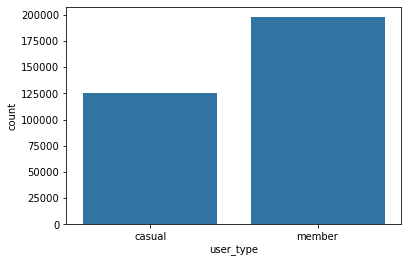

In [38]:
# plot of user type
base_color = sb.color_palette()[0]
sb.countplot(data = df_bike, x = 'user_type', color = base_color);

- There are more member than the casual user type in the capital bikesharing system. Members are 197,516 in number which constitute about 61.1%, while casual members make up the remaining 38.9%.

### Looking at days of the week ###
Question: <br>
- Which day of the week do riders prefer to ride?<br>

In [39]:
df_bike['weekdays'].value_counts()

Sat    61098
Sun    53792
Fri    50481
Thu    44207
Wed    41340
Tue    37492
Mon    34842
Name: weekdays, dtype: int64

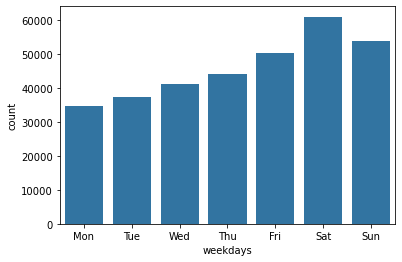

In [40]:
# set days of the weeek in ordered categorical data type.
df_bike.weekdays = pd.Categorical(df_bike.weekdays, ordered= True, categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# set the colour of the bar in the plot to blue
base_color = sb.color_palette()[0]
# plot to show which day of the week has the highest number of riders.
sb.countplot(data = df_bike , x= 'weekdays', color = base_color);

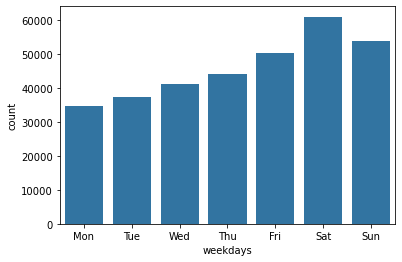

In [41]:
# Set days if the week in the right order
week_days = ['Mon','Tue', 'Wed', 'Thu','Fri','Sat','Sun']


df_bike.weekdays = pd.Categorical(df_bike.weekdays, ordered= True, categories=week_days)

# set the colour of the bar in the plot to blue
base_color = sb.color_palette()[0]
# plot to show which day of the week has the highest number of riders.
sb.countplot(data = df_bike , x= 'weekdays', color = base_color);

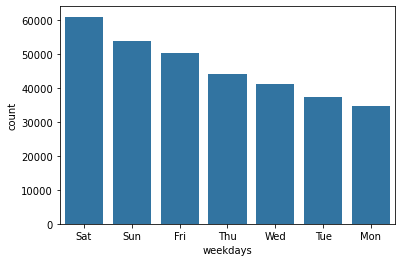

In [42]:
# set the plot in descending order
weekdays_order = df_bike['weekdays'].value_counts().index 
base_color = sb.color_palette()[0]

# plot to show which day of the week has the highest number of riders.
sb.countplot(data = df_bike , x= 'weekdays', color = base_color, order = weekdays_order);

- Riders prefer weekends to ride, that is Saturdays and Sundays.<br>
- The peak day is Saturday, however Monday is the least favourite day.

### Looking at hour of the day ###
Question: <br>
- What time of the day do riders start riding?<br>

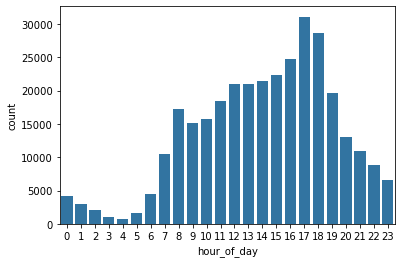

In [43]:
# set the colour of the bar in the plot to blue
base_color = sb.color_palette()[0]
# plot to show which time of the day has the highest number of riders.
sb.countplot(data = df_bike , x= 'hour_of_day', color = base_color);

- Considering the hour of 8am to 5pm the plot shows a unimodal type of plot with the peak frequency around 5pm and 6pm.<br>
- The most prefered start time for riders is around 5pm and 6pm. This might be that most riders take a ride after work.<br>

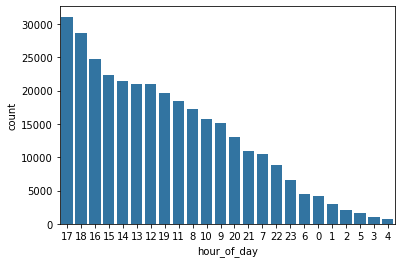

In [44]:
def hour_of_day():
    
    hour_order = df_bike['hour_of_day'].value_counts().index
    sb.countplot(data = df_bike , x= 'hour_of_day', color = base_color, order= hour_order);
    
hour_of_day()

__Next is the  distribution of duration in minutes__

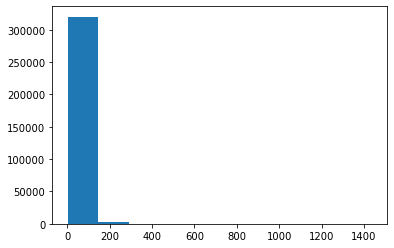

In [45]:
# plotting the histogram of duration in minutes in matplotlib 
plt.hist(data = df_bike, x = 'duration_min');

- No clear analytic visualization or patterns to draw from the plot above. Its better to apply appropriate bin.

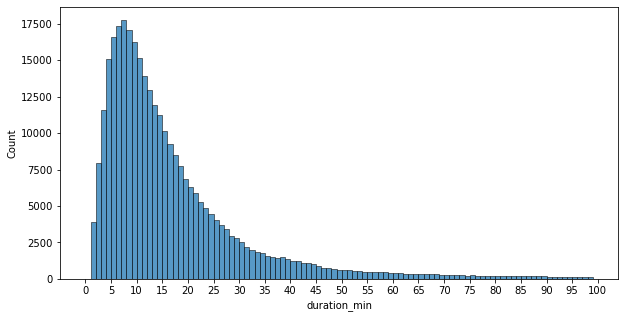

In [46]:
#Check the distribution of duration in minutes in seaborn
def histogram_duration_min():
    
    plt.figure(figsize=[10, 5])
    sb.histplot(df_bike['duration_min'], bins = range(100));
    plt.xticks(ticks=range(0, 105, 5))
    
        
histogram_duration_min()


- This plot looks very rightly skewed.<br>
- I will set the x axis to logarithm scale for better visualization.<br>
- This shows that most ride are between 5 and 10 minutes.

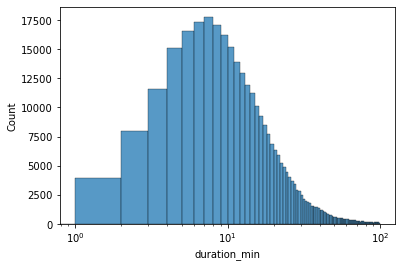

In [47]:
#Check the distribution of duration in minutes with x axis in logarithm scale

def duration_logarithm():    
    
    sb.histplot(df_bike['duration_min'], bins = range(100));
    plt.xticks(ticks=range(0, 210, 10))
    plt.xscale('log')    
        
duration_logarithm()

- This plot is unimodal with the peak duration around 8 minutes. Using the log scale for the x-axis gives a better and clearer visualization.

- Compaare the duration in minutes plots with and without the logarithm scale.

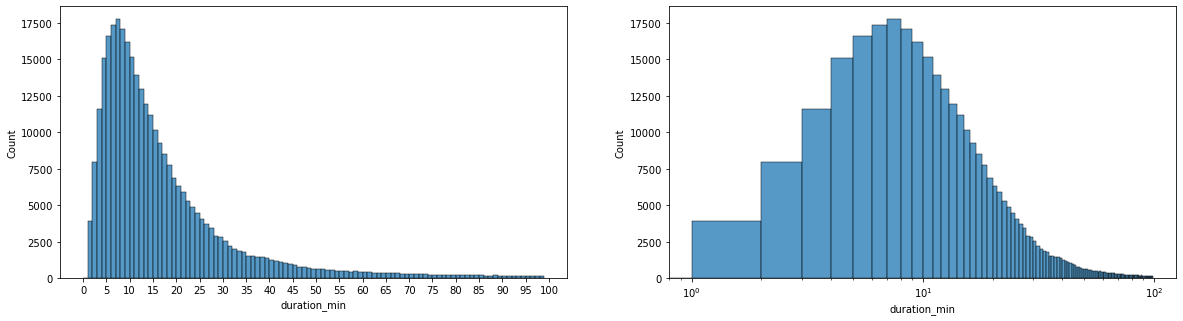

In [48]:
# Compare the duration_min plot and duration with log scale.

# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, 
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.histplot(df_bike['duration_min'], bins = range(100));
plt.xticks(ticks=range(0, 105, 5))

# histogram on right,     
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sb.histplot(df_bike['duration_min'], bins = range(100));
plt.xticks(ticks=range(0, 210, 10))
plt.xscale('log') 

-The histogram plot on the right with logarithm scale shows a better distribution of duration in minutes.

### Looking at the type of bikes available for riders ###
Question:<br>
    - What type of bike do riders prefer?

In [49]:
# getting the count of rideable bikes
rideable_counts= df_bike.rideable_type.value_counts()
rideable_counts

classic_bike     253711
electric_bike     46976
docked_bike       22565
Name: rideable_type, dtype: int64

In [50]:
# create an order from the highest to the lowest
rideable_order = rideable_counts.index

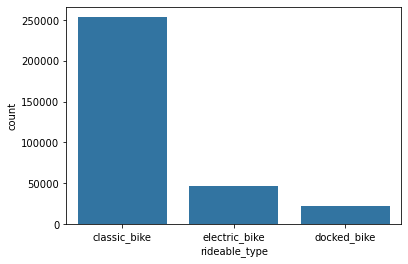

In [51]:
# creating a bar chart for the type of bicycles available for ride
def horizontal_bar():
    
    base_color = sb.color_palette()[0]
    sb.countplot(data=df_bike, x='rideable_type', color=base_color, order=rideable_order);
        
horizontal_bar()

In [52]:
# create an order from the highest to the lowest
rideable_order = rideable_counts.index

# create the number of the type of bike = 3
rideable_type = df_bike.rideable_type.value_counts().sum

rideable_num = df_bike['rideable_type'].value_counts().sum()

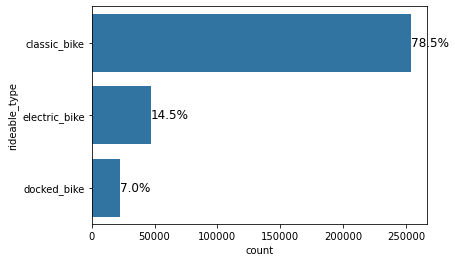

In [53]:
# print the text of each gender percentage on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=df_bike, y='rideable_type', color=base_color, order=rideable_order);

# Logic to print the proportion text on the bars
for i in range (rideable_counts.shape[0]):
    # Remember, rideable_counts contains the frequency of unique values in the `rideable_type` column in decreasing order.
    count = rideable_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/rideable_num)
    
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center', color = 'black', fontsize = 12)

- About 78.5% of the riders prefer classic bike, 14.5% prefer the electric_bike, while 7.0% prefer docked_bike.

Question<br>
-Where do most riders start from?

In [54]:

df_bike['start_station_name'].value_counts()

1st & M St NE                       3391
4th St & Madison Dr NW              3378
Lincoln Memorial                    3143
Jefferson Dr & 14th St SW           3087
New Hampshire Ave & T St NW         3059
                                    ... 
Jones Branch & Westbranch Dr           2
Inlet Ct & Wiehle Dr                   2
Columbus Ave & Tribeca St              2
Medical Center Dr & Key West Ave       2
Blueridge Ave & Elkin St               1
Name: start_station_name, Length: 659, dtype: int64

- This reveals that most of the riders take a round trip from the starting point and return to the same location.

Question:<br>
    - where do most of the riders start from?


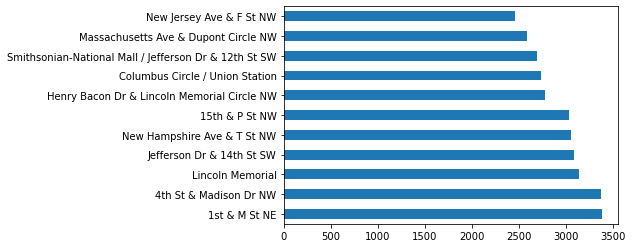

In [55]:
# Sort the location in descending order
station_start =df_bike['start_station_name'].value_counts()

# plot the first 10 start locations
# pass the parameter ascending=False in order to have the barchart plot
station_start.sort_values(ascending=False)[:11].plot(kind='barh');


- Riders usally start riding from 1st & M St NE, 4th St & Madison Dr NW, Jefferson Dr & 14th St SW,Lincoln Memorial and 15th & P St NW etc.              



Question:<br>
    - The least prefer place to start a ride from?

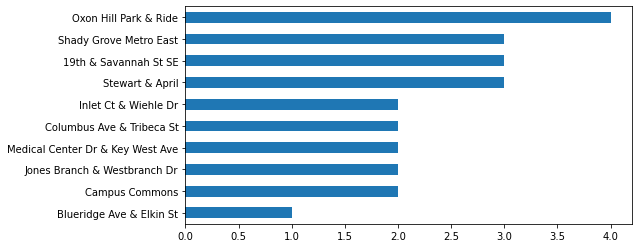

In [56]:

# Specify the figure size in inches, for both X, and Y axes 
rcParams['figure.figsize'] = 8,4

# sort the the starting locations of each ride
station_start =df_bike['start_station_name'].value_counts()

# plot the last 10 start locations
station_start.sort_values()[:10].plot(kind='barh');


- The plot above shows locations where riders hardly start riding  from, whch includes, blueridge Ave & Elkin St, Campus Commons etc.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The variables of interest are the trip duration, day of week,user type  and type of bike (rideable_type).<br>


- The duration_min data were not showing a proper distribution, it was skewed to the right with a very long tail. 
This was corrected for a better visualization by transforming the x-axis into  a logarithm scale. <br>
-It was discovered from the plot that majority of the riders spend between 5 and 8 minutes.  
-The time of ride 5-8 minutes could be interpreted as the bike rider going to a destination rather than taking the ride for pleasure.
- The classic bike is the most prefered type of bike.<br>
-To cap it all, 61.1% of the riders as members, while 38.9% are casual riders.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The first statistical analysis of the duration_min variable shows a negative time of -88 and maximum time of 33,540 minutes , these are two extreme outliers (unusual points) that were removed from the data.<br>
- This was done because there is nothing like a negative time of ride, also the maximum duration time correspond to about 23 days (which seem impossible as the whole dataset was for the month of October).







### Bivariate plots ###
__Plot1: Stacked Barchart__

Question<br>
    - Which day of the week do members or casual riders prefere to ride?

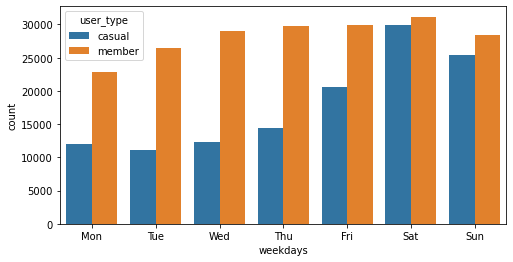

In [57]:
# stack barchart of casual and members by days of the weeek
#weekday_order = df_bike['weekdays'].value_counts()
sb.countplot(data = df_bike, x = 'weekdays', hue = 'user_type');

- From the above casual riders prefers Saturdays and Sundays, while members prefer Saturday, Friday and Thursdays.

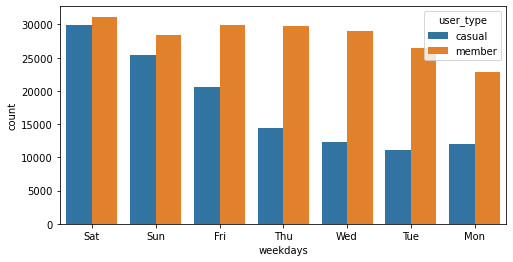

In [59]:
# make plot from the highest to the lowest
weekdays_order = df_bike['weekdays'].value_counts().index
sb.countplot(data = df_bike, x = 'weekdays', hue = 'user_type', order = weekdays_order);

- The insight from this plot reveals that casual user type prefers weekends (Saturdays,Sundays and Fridays in that order of prefence)<br>
- while members only reduce their rides on Mondays and Tuesdays. The prefered days are Wednesdays till Sunday.
-The lowest number of casual riders occurs on Tuesdays, while they hit the peak on Saturday.
- Members that are riders have their peak on Saturday but still maintains a high level of riding except for Mondays and Tuesdays.

In [60]:
# grouping the user_type by days of the week and getting their count under the ride_id column
start_df = df_bike.groupby(['user_type','weekdays'], as_index=False)['ride_id'].count()
start_df

,user_type,weekdays,ride_id
0,casual,Mon,12046
1,casual,Tue,11092
2,casual,Wed,12275
3,casual,Thu,14463
4,casual,Fri,20535
5,casual,Sat,29931
6,casual,Sun,25394
7,member,Mon,22796
8,member,Tue,26400
9,member,Wed,29065


<br>
Question<br>
    - What type of bike does user_type prefer?

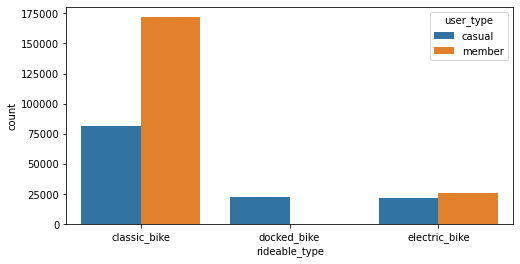

In [61]:
# type of bikes(rideable_type) grouped by user_type
sb.countplot(data = df_bike, x = 'rideable_type', hue = 'user_type');

- Member do not like to ride docked type of bike.<br>
- classic bike is the most preferred type of bike for both members and casual<br>
- Almost the same number of members prefers electric bike.<br>

__Plot2: Heat Map__<br>
Question<br>
    - What time of the day do riders prefer to ride?

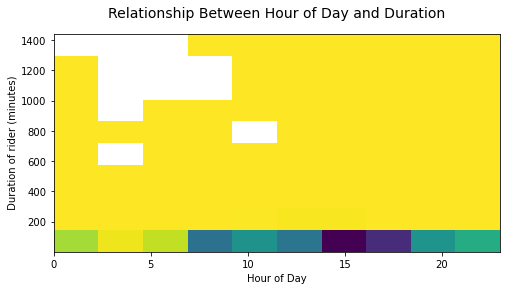

In [62]:
# Heat map to show variation betwwen age and duration of bike ride
plt.hist2d(data=df_bike, x = 'hour_of_day', y = 'duration_min', cmin=0.5,cmap= 'viridis_r');

# y = 1.05 create space betwwen the title and the plot
plt.title('Relationship Between Hour of Day and Duration', size= 14, y=1.05)
   
plt.xlabel('Hour of Day')
plt.ylabel(' Duration of rider (minutes)');

- There will be a need to specify the appropriate bin size for this heat map.

In [63]:
df_bike['hour_of_day'].describe()


count    323252.000000
mean         14.114774
std           4.891505
min           0.000000
25%          11.000000
50%          15.000000
75%          18.000000
max          23.000000
Name: hour_of_day, dtype: float64

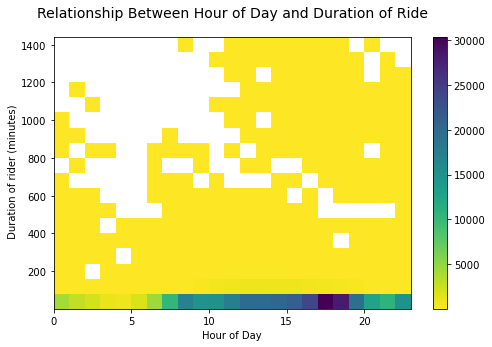

In [64]:
# plot the heat map using bin from the statistics.
bins_x=np.arange(0, 23+1, 1)
bins_y=np.arange(1, 1409+80, 80)

plt.figure(figsize=[8, 5])

plt.hist2d(data=df_bike, x = 'hour_of_day', y = 'duration_min', cmin=0.5,cmap= 'viridis_r', bins = [bins_x,bins_y]);

# y = 1.05 create space betwwen the title and the plot
plt.title('Relationship Between Hour of Day and Duration of Ride', size= 14, y=1.05)

plt.colorbar()   
plt.xlabel('Hour of Day')
plt.ylabel(' Duration of rider (minutes)');

- The heat map above shows that majority of the riders prefer 17hour which is 5pm as the time to start their ride.

__Plot3: Violin plot__

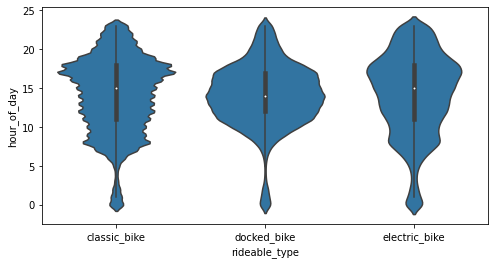

In [65]:
# a violin plot of rideable_type against hour of the day.
base_color=sb.color_palette()[0]
sb.violinplot(data= df_bike, x='rideable_type', y='hour_of_day', color = base_color);

- The plot above reveals that riders using the docked type of bike use it more around 15 hour, which is 3pm.

__Plot4: Box plot__

(0.0, 150.0)

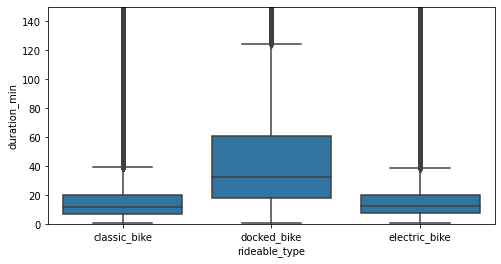

In [66]:
# create a boxplot plot of rideable_type with respect to duration in minute.
base_color=sb.color_palette()[0]
sb.boxplot(data= df_bike, x='rideable_type', y='duration_min', color = base_color);
plt.ylim(0, 150)

- Riders who use docked type of bike usually spend between 20-60 minutes.  


__Plot5: Scatter plot__

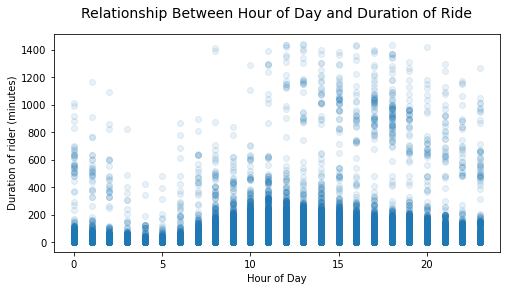

In [67]:
# looking at two quantitative variable, hour of the day and duration of ride
plt.scatter (data = df_bike, x = 'hour_of_day', y = 'duration_min', alpha= 0.1);

# y = 1.05 create space betwwen the title and the plot
plt.title('Relationship Between Hour of Day and Duration of Ride', size= 14, y=1.05)
   
plt.xlabel('Hour of Day')
plt.ylabel(' Duration of rider (minutes)');

__Plot6: Faceting__

Question<br>
    -What type of bike is prefered on which day of the week?

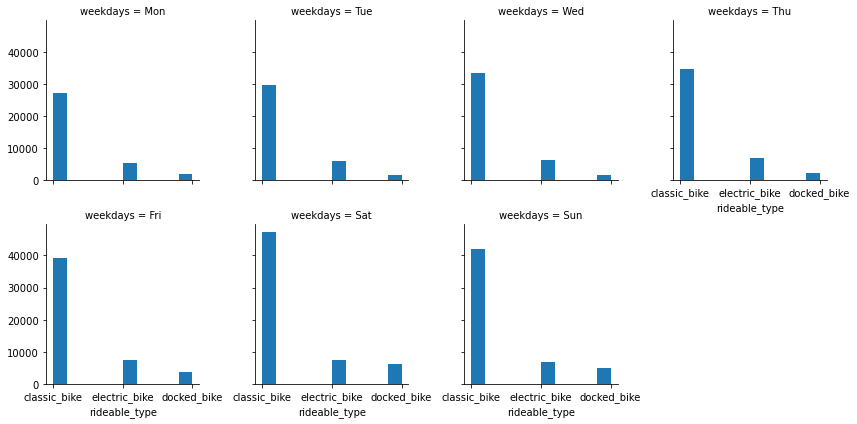

In [68]:
# facet plot to show the relationship between days of the week and type of bikes used

g = sb.FacetGrid(data=df_bike, col = 'weekdays', col_wrap = 4);
g.map(plt.hist, 'rideable_type');

-  more people prefer the classic type of bike most especially on saturdays.
- the electric bike is the second most preffered on all days.

#### How did the feature(s) of interest vary with other features in the dataset?

- The stacked barchart shows that From the above casual riders prefers Saturdays and Sundays, while members prefer Saturday, Friday and Thursdays.<br>
- classic bike is the most preferred type of bike for both members and casual.<br>
- The heat map reveals that majority of the riders prefers to start their ride between 5pm and 6pm.<br>


#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- Riders that prefers docked type of bike takes longer ride than classic and electric bikes.<br>
- The electric bike is the second most preffered on all days.<br>

## Multivariate Exploration
Question:<br>
    - What type of bike is most prefered on which day of the week for higher duration of ride?<br>

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


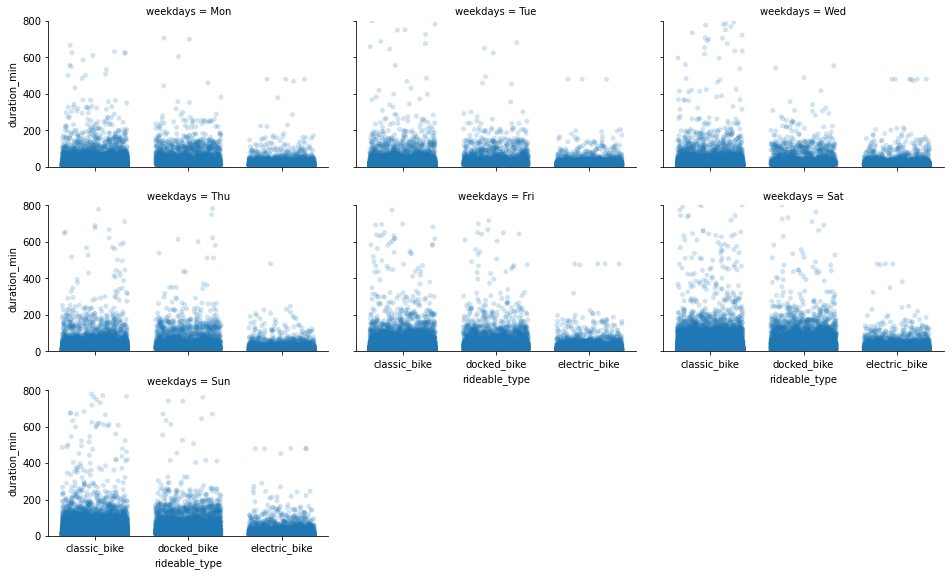

In [69]:

# adding duration_min to the faceted plot of the bivariate plot.
g = sb.FacetGrid(data=df_bike, col = 'weekdays', col_wrap = 3);
g.map(sb.stripplot, 'rideable_type', 'duration_min', alpha=.2, jitter=.35);
g.fig.set_size_inches(14,8);
plt.ylim(0,800);

- This plot reveal that the electric bike does not travel longer than other bikes. Electric bike hs the least duration.<br>

__Scatter plot of 3 variables; duration_min, hour_of_day and user_type__<br>
Question.<br>
- what is the relationship between the hour of the day, duration of ride and the uesrtype?

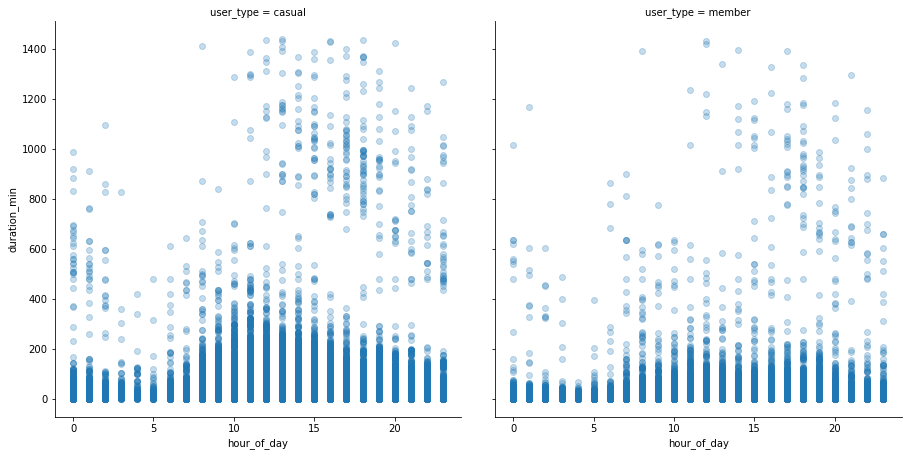

In [65]:
g = sb.FacetGrid(data=df_bike, col= 'user_type', col_wrap=2);
g.map(plt.scatter, 'hour_of_day', 'duration_min', alpha = 0.25);
g.fig.set_size_inches(14,8)
plt.show()


- The scatter plot is showing a particular pattern, but it is not visible with the whole plot. I will set the y-axis limit to 800.

<br>
Set the y limit to 800 minutes

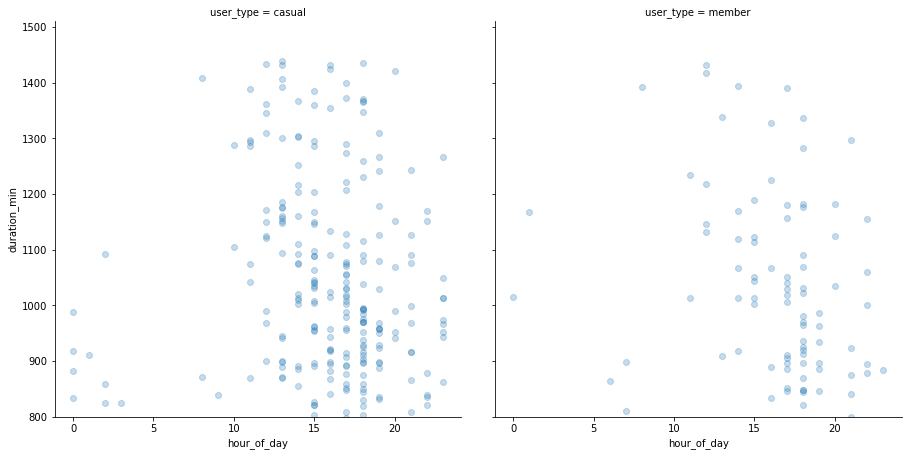

In [70]:
# facegrid to show scatter plot
g = sb.FacetGrid(data=df_bike, col= 'user_type', col_wrap=2);
g.map(plt.scatter, 'hour_of_day', 'duration_min', alpha = 0.25);
g.fig.set_size_inches(14,8)
plt.ylim(800);
plt.show()


- The scatter plot of duration above 800 minutes shows that;<br>
    -There are more casual riders than members in this category.<br>
    -There is intersection of casual and member riders around 5 and 6 pm(17&18 hours).<br>

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Majority of people that ride above 800 minutes are casual riders, The hour of the day 5-7 pm is most prefered time for long duration_minutes.

- Most riders with duration above 800 minutes usually don't start riding until noon.


### Were there any interesting or surprising interactions between features?

- One initeresting feature here is that the docked bike duration reduced on wednesdays as shown in the facet plot.

## Conclusions
- There are two types of users,members and casuals.There are more members than casual riders, 68.1% are members while 38.9% are casuals.<br>
- There are 3 types of bike available for ride, classic, docked and electronic bike, with 78.5%, 14.5% and 7.0% respectively.<br>
- Most casual riders prefers Saturdays and Sundays, while members prefer Saturday, Friday and Thursdays
- The hour of 5pm and 6pm is the favorite time for riding bikes, and those rides do not extend beyond 100 minutes
- On all days of the week, the electric bike does not travel longer than other bikes in terms of duration of ride




### Resources
- https://realpython.com/pandas-sort-python/